#**Training a Model 'model_v15' on D4 - 3.3 secs Dataset - DM2**<br>

---


###**Guestures:**
1.      No Motion
2.      Left Swing
3.      Right Swing
4.      Adduction
5.      Flexion


Author: Vanitha P & Jatin Kadge <br>
Date: 05'th Dec 2023

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil

In [ ]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import shutil
import random

# Set the path to our data folder
data_dir = '/content/drive/MyDrive/iGest/Data/05_Dec/3_3-secs_Samples'

# Set the path to our train and test folders
train_dir = '/content/drive/MyDrive/iGest/Data/05_Dec/Train_Test/Train'
test_dir = '/content/drive/MyDrive/iGest/Data/05_Dec/Train_Test/Test'

#Drive Link: https://drive.google.com/drive/folders/19_DLihXj594NRIow7G-10f4maR_aOd3D?usp=sharing

In [ ]:
# #Finding the minimum, maximum and the average of the length of the the file.
x_array = []

for gesture_folder in os.listdir(train_dir):
  gesture_path = os.path.join(train_dir, gesture_folder)
  print(gesture_path)

  if os.path.isdir(gesture_path):
    for sample_file_1 in os.listdir(gesture_path):
      #print(sample_file)
      file = f'{gesture_path}/{sample_file_1}'
      # Read the CSV file into a DataFrame
      #print(file)
      df = pd.read_csv(file, header = None)
      print(len(df))
      x_array.append(len(df))

for gesture_folder in os.listdir(test_dir):
  gesture_path = os.path.join(test_dir, gesture_folder)
  print(gesture_path)

  if os.path.isdir(gesture_path):
    for sample_file_2 in os.listdir(gesture_path):
      # Read the CSV file into a DataFrame
      file = f'{gesture_path}/{sample_file_2}'
      df = pd.read_csv(file, header = None)
      print(len(df))
      x_array.append(len(df))

print(x_array)

x_avg = np.mean(x_array)
x_min = np.min(x_array)
x_max = np.max(x_array)

print(x_avg)
print(x_min)
print(x_max)

/content/drive/MyDrive/iGest/Data/05_Dec/Train_Test/Train/Adduction
54
54
55
54
54
54
54
54
54
53
54
54
54
54
54
54
54
53
54
54
54
54
54
54
55
55
54
54
54
53
54
54
54
54
53
54
54
53
54
54
/content/drive/MyDrive/iGest/Data/05_Dec/Train_Test/Train/Flexion
54
53
54
54
54
54
54
54
54
53
54
54
54
54
53
54
54
54
54
53
55
54
54
53
53
54
54
54
53
54
54
54
55
53
54
54
54
54
54
53
/content/drive/MyDrive/iGest/Data/05_Dec/Train_Test/Train/Left_swing
55
54
54
55
54
54
54
54
54
55
54
55
54
54
54
54
54
54
54
55
54
55
54
53
54
54
55
53
53
53
54
54
54
55
55
54
54
54
54
54
/content/drive/MyDrive/iGest/Data/05_Dec/Train_Test/Train/No_motion
55
55
55
54
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
/content/drive/MyDrive/iGest/Data/05_Dec/Train_Test/Train/Right_swing
54
54
55
55
55
54
54
55
54
54
55
54
56
54
54
54
54
54
54
54
54
55
54
54
54
54
54
55
54
54
55
55
55
54
55
54
54
54
54
55
/content/drive/MyDrive/iGest/Data/05_Dec/Train_Test/Test/Ad

In [ ]:
def label_data(gesture, df):
  df['Gesture'] = gesture
  return df

In [ ]:
#instance_size = x_min
#sample size set to 50

instance_size = 50


In [ ]:
instance_size

50

In [ ]:
# from itertools import islice

train=[]

for ges_folder in os.listdir(train_dir):
    folder_name = ges_folder
    csv_file_path=os.path.join(train_dir, ges_folder)

    for file in os.listdir(csv_file_path):

        sample_path=os.path.join(csv_file_path, file)

        sample_df=pd.read_csv(sample_path, skiprows=lambda x: x> instance_size)

        # Rename columns
        sample_df.columns = [ "Ax", "Ay", "Az", "Gx", "Gy","Gz", "Counts", "Timestamp"]

        # Reordering columns
        sample_df_f = sample_df[["Counts", "Timestamp", "Ax", "Ay", "Az", "Gx", "Gy", "Gz"]]

        sample_labeled_df=label_data(folder_name, sample_df_f)

        sample_labeled_df=sample_labeled_df.drop(columns=['Counts','Timestamp'], axis=1)

        # print(sample_labeled_df)

        train.append(sample_labeled_df)

print("train shape:", len(train))

<ipython-input-5-734a245f3ebd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gesture'] = gesture
<ipython-input-5-734a245f3ebd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gesture'] = gesture
<ipython-input-5-734a245f3ebd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

train shape: 200


<ipython-input-5-734a245f3ebd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gesture'] = gesture
<ipython-input-5-734a245f3ebd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gesture'] = gesture
<ipython-input-5-734a245f3ebd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

In [ ]:
test=[]

for ges_folder in os.listdir(test_dir):
    folder_name = ges_folder
    csv_file_path=os.path.join(test_dir, ges_folder)

    for file in os.listdir(csv_file_path):

        sample_path=os.path.join(csv_file_path, file)

        sample_df=pd.read_csv(sample_path, skiprows=lambda x: x> instance_size)

        # Rename columns
        sample_df.columns = [ "Ax", "Ay", "Az", "Gx", "Gy","Gz", "Counts", "Timestamp"]

        # Reordering columns
        sample_df_f = sample_df[["Counts", "Timestamp", "Ax", "Ay", "Az", "Gx", "Gy", "Gz"]]

        sample_labeled_df=label_data(folder_name, sample_df_f)

        sample_labeled_df=sample_labeled_df.drop(columns=['Counts','Timestamp'], axis=1)

        test.append(sample_labeled_df)

print("\ntest shape:\n", len(test))

<ipython-input-5-734a245f3ebd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gesture'] = gesture
<ipython-input-5-734a245f3ebd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gesture'] = gesture
<ipython-input-5-734a245f3ebd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v


test shape:
 50


<ipython-input-5-734a245f3ebd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gesture'] = gesture
<ipython-input-5-734a245f3ebd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gesture'] = gesture
<ipython-input-5-734a245f3ebd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

In [ ]:
train

[      Ax    Ay    Az     Gx      Gy     Gz    Gesture
 0   0.06 -0.07  1.00  -0.73    0.16  -0.02  Adduction
 1   0.06 -0.07  1.00  -0.96    0.24   0.18  Adduction
 2   0.06 -0.07  1.00  -1.59    0.09  -0.09  Adduction
 3   0.06 -0.07  1.00  -0.81    0.16  -0.07  Adduction
 4   0.06 -0.07  1.00  -0.93    0.22  -0.07  Adduction
 5   0.07 -0.08  1.02  -2.61    1.37   0.65  Adduction
 6   0.07 -0.06  1.06  -6.40    4.99   2.36  Adduction
 7   0.07 -0.09  1.14  -7.95   18.44   3.70  Adduction
 8   0.08 -0.11  1.26  -5.68   52.15   7.15  Adduction
 9   0.06 -0.09  1.24 -16.43   90.30   7.47  Adduction
 10 -0.03 -0.09  1.10 -25.15  120.52   7.53  Adduction
 11 -0.15 -0.11  0.95 -34.99  132.48   8.29  Adduction
 12 -0.31 -0.16  0.77 -21.30  131.49   6.67  Adduction
 13 -0.49 -0.22  0.69  -9.34  126.48   6.34  Adduction
 14 -0.62 -0.19  0.57   2.56  126.05   0.71  Adduction
 15 -0.72 -0.18  0.40  -1.82  122.14  -1.60  Adduction
 16 -0.80 -0.18  0.27   3.67  107.32  -5.53  Adduction
 17 -0.91 

In [ ]:
test

[      Ax    Ay    Az      Gx      Gy      Gz    Gesture
 0   0.07 -0.13  0.99   -0.22    0.17   -0.34  Adduction
 1   0.07 -0.13  0.99 -310.46  100.01 -310.28  Adduction
 2   0.07 -0.13  0.99   -0.35    0.24   -0.32  Adduction
 3   0.06 -0.13  0.99   -0.39    0.12   -0.28  Adduction
 4   0.07 -0.13  0.99   -0.17    0.21   -0.29  Adduction
 5   0.07 -0.14  0.99   -3.37    0.16   -0.29  Adduction
 6   0.07 -0.13  0.99   -0.11    0.27   -0.38  Adduction
 7   0.07 -0.13  0.99    0.15    0.28   -0.20  Adduction
 8   0.07 -0.13  0.99    0.57    0.48    0.06  Adduction
 9   0.07 -0.14  1.00    0.37    0.90    0.20  Adduction
 10  0.11 -0.11  1.10   -1.86    7.92    3.21  Adduction
 11  0.16 -0.11  1.23  -25.81   30.96    9.27  Adduction
 12  0.07 -0.24  1.30  -28.20   76.06   12.48  Adduction
 13 -0.02 -0.25  1.10  -22.72  111.12   16.87  Adduction
 14 -0.13 -0.19  0.98  -10.00  127.87   15.70  Adduction
 15 -0.27 -0.18  0.83  -16.76  135.45   14.90  Adduction
 16 -0.41 -0.15  0.70  -28.83  

# Create X_train and y_train:

In [ ]:
# Assuming your list of time series samples is called "train"
# Convert it to a numpy array for easier manipulation
train_array = np.array(train)

# Extract features (X_train) and target variable (y_train)
X_train = train_array[:, :, :6]
y_train = train_array[:, -1, -1].reshape(-1, 1)

# Print the shapes to verify
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (200, 50, 6)
y_train shape: (200, 1)


In [ ]:
y_train[0]

array(['Adduction'], dtype=object)

# Create X_test and y_test:

In [ ]:
# Assuming your list of time series samples is called "test"
# Convert it to a numpy array for easier manipulation
test_array = np.array(test)

# Extract features (X_train) and target variable (y_train)
X_test = test_array[:, :, :6]
y_test = test_array[:, -1, -1].reshape(-1, 1)

# Print the shapes to verify
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (50, 50, 6)
y_test shape: (50, 1)


#### **Training the machine learning model over the data**

In [ ]:
# converting the numpy arrays to tensors
import tensorflow as tf

def conv_tensor(x):
  t = tf.convert_to_tensor(x.astype('float32'))
  return t

In [ ]:
print('TensorFlow ' + tf.__version__)

TensorFlow 2.14.0


Importing the necessary modules for the machine learning model

In [ ]:
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from io import StringIO
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Conv1D
from keras.layers import Conv2D
from keras.layers import MaxPooling1D
from keras.layers import MaxPooling2D
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

##### **ML model**

Over here we used a sequential convolutional neural network. The data consisted of m samples, where each sample had 10 subsequent time stamps and each time stamp containing 6 features.

This is a sequential model with the following layers


1. Conv2D layer with 4 filters, kernel size of (3,1) and ReLU activation, with input shape of (n_timesteps, n_features).
2. Another Conv2D layer with 4 filters, kernel size of (3,1) and ReLU activation.
3. A dropout layer with 0.5 dropout rate.
4. A MaxPooling2D layer with pool size of (2,1).
5. A flatten layer.
6. A dense layer with 10 neurons and ReLU activation.
7. Another dense layer with n_outputs neurons and softmax activation.

The model is compiled with categorical cross-entropy loss, adam optimizer and accuracy metric. It is trained with the given trainX and trainy data for a specified number of epochs and batch size. Finally, the accuracy of the model is evaluated on the testX and testy data.

###### **4**
This is a model having **500 epochs**. This means that the training data will pass throught the model 500 times so that the model can see hidden patterns which were not seen in the initial iterations.

In [ ]:
label_encoder = LabelEncoder()
y_train_one_hot0 = label_encoder.fit_transform(y_train.ravel())
y_test_one_hot0 = label_encoder.fit_transform(y_test.ravel())

y_train_one_hot = to_categorical(y_train_one_hot0)
y_test_one_hot = to_categorical(y_test_one_hot0)

2/2 [==============================] - 0s 48ms/step
Score of experiment >#1: 96.000
2/2 [==============================] - 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Score of experiment >#2: 80.000
2/2 [==============================] - 0s 6ms/step
Score of experiment >#3: 94.000
2/2 [==============================] - 0s 7ms/step
Score of experiment >#4: 94.000


2/2 [==============================] - 0s 8ms/step


Score of experiment >#5: 96.000


2/2 [==============================] - 0s 10ms/step


Score of experiment >#6: 94.000
2/2 [==============================] - 0s 7ms/step
Score of experiment >#7: 96.000
2/2 [==============================] - 0s 8ms/step
Score of experiment >#8: 100.000
2/2 [==============================] - 0s 6ms/step
Score of experiment >#9: 96.000
2/2 [==============================] - 0s 6ms/step
Score of experiment >#10: 94.000
Average Classification report:
          class  precision  recall  f1-score  support
0    Adduction      1.000    1.00     1.000     10.0
1      Flexion      0.775    0.85     0.811     10.0
2   Left_Swing      1.000    0.99     0.995     10.0
3    No_Motion      0.889    0.86     0.862     10.0
4  Right_Swing      1.000    1.00     1.000     10.0
Scores of 10 experiments: ['96.000', '80.000', '94.000', '94.000', '96.000', '94.000', '96.000', '100.000', '96.000', '94.000']
Accuracy: 94.000%


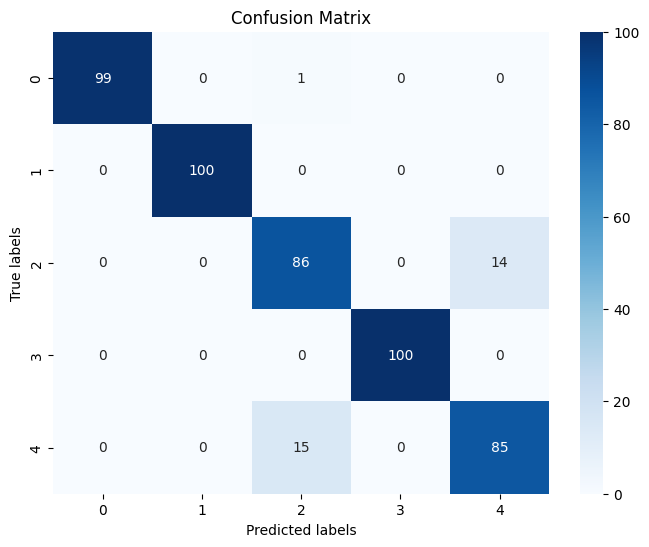

In [ ]:

# fit and evaluate a model
def evaluate_model(trainX, trainy, testX, testy):
    verbose, epochs, batch_size = 0, 500, 32
    n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
    model = Sequential()
    model.add(Conv2D(filters=4, kernel_size=(3,1), activation='relu', input_shape=(n_timesteps,n_features,1)))
    model.add(Conv2D(filters=4, kernel_size=(3,1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling2D(pool_size=(2,1)))
    model.add(Flatten())
    model.add(Dense(10, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit network
    model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)

    #######SAVING The MODEL
    model.save("/content/drive/MyDrive/iGest/Data/05_Dec/Models/dmodel_v10-DM2-3_3secs_reduced_2.keras")


    ########Loading the model
    loaded_model = tf.keras.models.load_model("/content/drive/MyDrive/iGest/Data/05_Dec/Models/dmodel_v10-DM2-3_3secs_reduced_2.keras")

    # confusion matrix
    y_pred = loaded_model.predict(testX)
    y_true = [np.argmax(testy[i]) for i in range(len(testy))]
    y_pred_classes = [np.argmax(y_pred[i]) for i in range(len(y_pred))]

    confusion_mtx = confusion_matrix(y_true, y_pred_classes)

    # evaluate model
    _, accuracy = loaded_model.evaluate(testX, testy, batch_size=batch_size, verbose=0)

    classifi_report= classification_report(y_true, y_pred_classes, target_names= ["Left_Swing", "Right_Swing", "No_Motion", "Adduction", "Flexion"])

    return accuracy, confusion_mtx, classifi_report

# summarize scores
def summarize_results(scores, scores_list):
    #print("Scores:", scores)
    print("Scores of 10 experiments:", scores_list)
    # m, s = mean(scores), std(scores)
    # print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))
    m = mean(scores)
    print('Accuracy: %.3f%%' % (m))

def average(classification_reports):
    #collecting classification report list string
    combined_classification_report = '\n\n'.join(classification_reports)
    classification_reports_df = pd.read_fwf(StringIO(combined_classification_report))
    #adding column names
    classification_reports_df.columns = ['class', 'precision', 'recall', 'f1-score', 'support']
    #dropping nan values and accuracy, micro avg, weighted avg rows
    classification_reports_df = classification_reports_df.dropna(subset=['class'], axis=0)
    classification_reports_df = classification_reports_df[~classification_reports_df['class'].isin(['accuracy', 'macro avg', 'weighted avg'])]
    #droping index column

    classification_reports_df.reset_index(drop=True, inplace=True)
    #to find average
    numeric_cols = ['precision', 'recall', 'f1-score', 'support']
    classification_reports_df[numeric_cols] = classification_reports_df[numeric_cols].astype(float)
    average_values = classification_reports_df.groupby('class').mean().reset_index()
    print("Average Classification report:\n", average_values)

# run an experiment
def run_experiment(repeats=10):
    # load data
    trainX, trainy, testX, testy = conv_tensor(X_train),conv_tensor(y_train_one_hot),conv_tensor(X_test),conv_tensor(y_test_one_hot)
    # repeat experiment

    total_conf = np.zeros([5,5])

    scores = list()
    scores_list = list()

    classification_reports = []

    for r in range(repeats):
        score, confusion_mtx, classifi_report = evaluate_model(trainX, trainy, testX, testy)
        score = score * 100.0
        score_list = "{:.3f}".format(score)
        print('Score of experiment >#%d: %.3f' % (r+1, score))
        scores.append(score)
        scores_list.append(score_list)
        total_conf+=confusion_mtx
        classification_reports.append(classifi_report)



    # summarize results
    average(classification_reports)
    summarize_results(scores, scores_list)
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(total_conf, annot=True, cmap='Blues', fmt='g', ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    plt.show()
# run the experiment
run_experiment()